# Extraindo as Letras da Discografia do Louis Tomlinson

Louis William Tomlinson (Doncaster, 24 de dezembro de 1991) é um cantor e compositor britânico. Começou sua carreira como ator, inicialmente aparecendo no drama da *ITV*, *Fat Friends* como um personagem extra, e em seguida nos filmes de drama *If I Had You* da *ITV1* e na série *Waterloo Road* da *BBC*. Em 2010 foi um dos membros fundadores da banda *pop* One Direction, que terminou em terceiro lugar no *reality show The X Factor*.

Mais informações no link: https://pt.wikipedia.org/wiki/Louis_Tomlinson

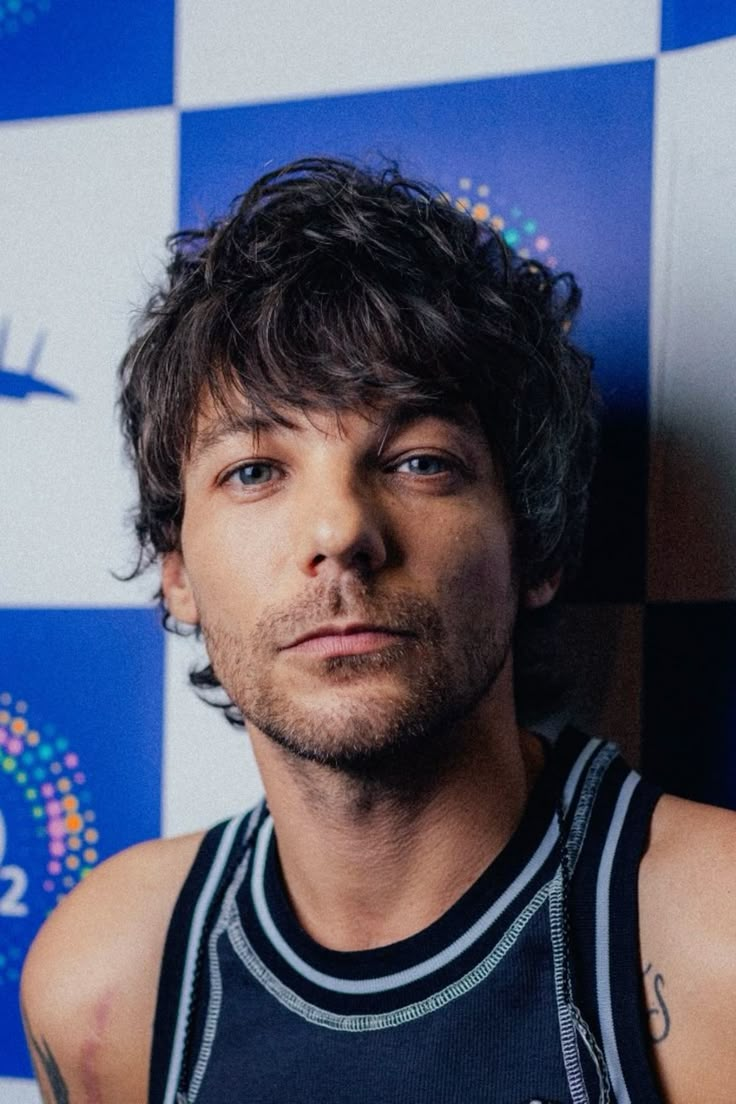

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

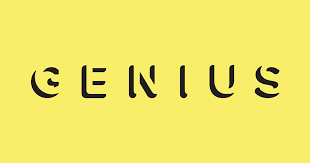

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Louis Tomlinson", max_songs=40)

Searching for songs by Louis Tomlinson...

Song 1: "Back To You"
Song 2: "Always You"
Song 3: "Only the Brave"
Song 4: "Defenceless"
Song 5: "Two of Us"
Song 6: "Miss You"
Song 7: "Too Young"
Song 8: "Copy of a Copy of a Copy"
Song 9: "Fearless"
Song 10: "Habit"
Song 11: "Walls"
Song 12: "Perfect Now"
Song 13: "Don’t Let It Break Your Heart"
Song 14: "We Made It"
Song 15: "Just Like You"
Song 16: "Kill My Mind"
Song 17: "Bigger Than Me"
Song 18: "Silver Tongues"
Song 19: "Written All Over Your Face"
Song 20: "Change"
Song 21: "Chicago"
Song 22: "Lucky Again"
Song 23: "Saturdays"
Song 24: "The Greatest"
Song 25: "All This Time"
Song 26: "Angels Fly"
Song 27: "She Is Beauty We Are World Class"
Song 28: "Holding On To Heartache"
Song 29: "Face the Music"
Song 30: "Headline"
Song 31: "That’s the Way Love Goes"
Song 32: "Common People"
Song 33: "Out of My System"
Song 34: "All Along"
"Halfway Home" is not valid. Skipping.
Song 35: "Those Times*"
Song 36: "Saved By A Stranger (Demo)"
"Secret

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_LouisTomlinson.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_LouisTomlinson.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[33, 34, 39])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Back To You,[Verse 1: Bebe Rexha]\nI know you say you know...,2017-07-21,Pop Party 2017,2017
1,Always You,[Verse 1]\nI went to Amsterdam without you\nAn...,2020-01-31,Walls (Japanese Edition),2020
2,Only the Brave,"[Verse 1]\nPour mercy, mercy on me, set fire t...",2020-01-31,Walls (Japanese Edition),2020
3,Defenceless,[Verse 1]\nI come runnin' to you like a moth i...,2020-01-31,Walls (Japanese Edition),2020
4,Two of Us,[Verse 1]\nIt's been a minute since I called y...,2019-03-07,Walls (Japanese Edition),2019
5,Miss You,[Verse 1]\nIs it my imagination?\nIs it someth...,2017-12-01,Walls (Japanese Edition),2017
6,Too Young,[Intro]\nWe were too young to know we had ever...,2020-01-31,Walls (Japanese Edition),2020
7,Copy of a Copy of a Copy,"[Verse 1]\nIt's an old curse, dreamers divin' ...",2022-11-11,Faith in the Future (Target Exclusive),2022
8,Fearless,[Verse 1]\nCash in your weekend treasures\nFor...,2020-01-31,Walls (Japanese Edition),2020
9,Habit,[Verse 1]\nI always said that I'd mess up even...,2020-01-31,Walls (Japanese Edition),2020


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("LouisTomlinsonLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('LouisTomlinson.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Back To You',
  ' bebe rexha know know know well days even know myself always thought someone else thought would felt yeah  bebe rexha call never even answer tell done wicked games numb laughter that forget pain  bebe rexha stress kill drag down fuck ground screaming know make stop love hate take keep coming back  louis tomlinson know friends give advice like move mind think even tried cornered hands tied  louis tomlinson bebe rexha addicted drama tell done wicked games numb laughter that forget pain  louis tomlinson stress kill drag down fuck ground screaming know make stop love hate take keep coming back post  louis tomlinson back keep coming back back keep coming back bridge louis tomlinson guess never know bullshit through guess never know  bebe rexha louis tomlinson yeah kiss harder pill ease pain cause know addicted drama baby again  louis tomlinson bebe rexha stress kill drag down fuck ground screaming know make stop love hate take keep coming back post  louis tomlinson bebe 